## Target TotalGHGEmissions¶

In [1]:
# Importation des librairies


import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec 
import statsmodels as stat
from statsmodels.tsa.api import Holt
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
data = pd.read_csv("data_modeling_P4.csv", sep=",")

In [3]:
for col in data.columns :
    print(col)

Unnamed: 0
Latitude
Longitude
NumberofBuildings
NumberofFloors
PropertyGFATotal
LargestPropertyUseTypeGFA
SecondLargestPropertyUseTypeGFA
ThirdLargestPropertyUseTypeGFA
ENERGYSTARScore
SiteEUI(kBtu/sf)
SiteEUIWN(kBtu/sf)
SourceEUI(kBtu/sf)
SiteEnergyUse(kBtu)
SiteEnergyUseWN(kBtu)
SteamUse(kBtu)
Electricity(kBtu)
NaturalGas(kBtu)
TotalGHGEmissions
GHGEmissionsIntensity
building_age
NonResidential
Nonresidential COS
Nonresidential WA
contain_parking
parking_area_rate
Office_largest_area_rate
Non_Refrigerated_Warehouse_largest_area_rate
Retail_Store_area_rate
Other_largest_area_rate
Hotel_largest_area_rate
Worship_Facility_largest_area_rate
Distribution_Center_largest_area_rate
Medical_Office_largest_area_rate
Supermarket_largest_area_rate
K_12_School_largest_area_rate
Recreation_largest_area_rate
Office_second_largest_area_rate
Retail_Store_second_largest_area_rate
Other_second_largest_area_rate
Restaurant_second_largest_area_rate
Non_Refrigerated_Warehouse_second_largest_area_rate
Offi

In [4]:
data = data.drop(['Unnamed: 0'], axis=1)

**Model preparation**

In [5]:
# TotalGHGEmissions sont les valeurs que nous voulons prédire
TotalGHGEmissions = np.array(data['TotalGHGEmissions'])

In [6]:
# Eliminer TotalGHGEmissions de data
data_to_model_emission = data.drop(['SiteEnergyUseWN(kBtu)', 'SiteEnergyUse(kBtu)', 'NaturalGas(kBtu)', 'Electricity(kBtu)', 'SteamUse(kBtu)', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'TotalGHGEmissions', 'GHGEmissionsIntensity'], axis = 1)

In [7]:
# Enregistrement des noms de colonnes pour une utilisation ultérieure
data_to_model_emission_list = list(data_to_model_emission.columns)

In [8]:
# Convertir en numpy array
data_to_model_emission = np.array(data_to_model_emission)

**Training and Testing Sets**

In [9]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

In [10]:
# Split the data into training and testing sets
train_data_to_model_emission, test_data_to_model_emission, train_TotalGHGEmissions, test_TotalGHGEmissions = train_test_split(data_to_model_emission, TotalGHGEmissions, test_size = 0.25, random_state = 42)

Nous pouvons examiner la forme de toutes les données pour nous assurer que nous avons tout fait correctement.

In [11]:
print('Training data_to_model_emission Shape:', train_data_to_model_emission.shape)
print('Training TotalGHGEmissions Shape:', train_TotalGHGEmissions.shape)
print('Testing data_to_model_emission Shape:', test_data_to_model_emission.shape)
print('Testing TotalGHGEmissions Shape:', test_TotalGHGEmissions.shape)

Training data_to_model_emission Shape: (1131, 132)
Training TotalGHGEmissions Shape: (1131,)
Testing data_to_model_emission Shape: (377, 132)
Testing TotalGHGEmissions Shape: (377,)


**Train Model**

In [12]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

In [13]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [14]:
# Train the model on training data
rf.fit(train_data_to_model_emission, train_TotalGHGEmissions)

RandomForestRegressor(n_estimators=1000, random_state=42)

**Make Predictions on the Test Set**

In [15]:
# Use the forest's predict method on the test data
predictions_emission = rf.predict(test_data_to_model_emission)

**Evaluation of the model R^2**

In [16]:
from sklearn.metrics import r2_score
test_score = r2_score(test_TotalGHGEmissions, predictions_emission)

print('R-squared scores:', round(test_score, 5))

R-squared scores: 0.31843


In [17]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error


# Mean absolute error (MAE)
mae = mean_absolute_error(test_TotalGHGEmissions, predictions_emission)
mape = mean_absolute_percentage_error(test_TotalGHGEmissions, predictions_emission)

print('Mean Absolute Error:', round(mae, 2))
print('Mean Absolute Percentage Error:', round(mape, 2))

Mean Absolute Error: 106.33
Mean Absolute Percentage Error: 1.32


**Tuning**

In [18]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Find the best parameters for the model
parameters = {
 'bootstrap': [True, False],
 'max_depth': [4, 5, 6, 7, 8, 10, 15, 20, 25, 30, None],
 'max_features': ['auto', 'sqrt'],
 #'min_samples_leaf': [1, 2, 4],
 #'min_samples_split': [2, 5, 10],
 'n_estimators': [600, 800, 1000, 1200, 1400]
}

gridforest = GridSearchCV(rf, parameters, cv = 3, n_jobs = -1, verbose = 1, scoring = 'r2')
gridforest.fit(train_data_to_model_emission, train_TotalGHGEmissions)
gridforest.best_params_

Fitting 3 folds for each of 220 candidates, totalling 660 fits


{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'sqrt',
 'n_estimators': 800}

**New results**

In [19]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 800, max_depth = 20, max_features = 'sqrt', bootstrap = True, random_state = 42)

In [21]:
# Train the model on training data
rf.fit(train_data_to_model_emission, train_TotalGHGEmissions)

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=800,
                      random_state=42)

**Make Predictions on the Test Set**

In [22]:
# Use the forest's predict method on the test data
predictions_emission = rf.predict(test_data_to_model_emission)

**Evaluation of the model R^2**

In [23]:
from sklearn.metrics import r2_score
test_score = r2_score(test_TotalGHGEmissions, predictions_emission)

print('R-squared scores:', round(test_score, 5))

R-squared scores: 0.59568


Lorsque les hyperparamètres sont ajustés, les performances du modèle s'améliorent considérablement

## Ridge Regression

In [24]:
# TotalGHGEmissions sont les valeurs que nous voulons prédire
TotalGHGEmissions = np.array(data['TotalGHGEmissions'])

In [25]:
# Eliminer TotalGHGEmissions de data
data_to_model_emission = data.drop(['SiteEnergyUseWN(kBtu)', 'SiteEnergyUse(kBtu)', 'NaturalGas(kBtu)', 'Electricity(kBtu)', 'SteamUse(kBtu)', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'TotalGHGEmissions', 'GHGEmissionsIntensity'], axis = 1)

In [26]:
# Enregistrement des noms de colonnes pour une utilisation ultérieure
data_to_model_emission_list = list(data_to_model_emission.columns)

In [27]:
# Convertir en numpy array
data_to_model_emission = np.array(data_to_model_emission)

**Training and Testing Sets**

In [28]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

In [29]:
# Split the data into training and testing sets
train_data_to_model_emission, test_data_to_model_emission, train_TotalGHGEmissions, test_TotalGHGEmissions = train_test_split(data_to_model_emission, TotalGHGEmissions, test_size = 0.25, random_state = 42)

In [30]:
print('Training data_to_model_emission Shape:', train_data_to_model_emission.shape)
print('Training TotalGHGEmissions Shape:', train_TotalGHGEmissions.shape)
print('Testing data_to_model_emission Shape:', test_data_to_model_emission.shape)
print('Testing TotalGHGEmissions Shape:', test_TotalGHGEmissions.shape)

Training data_to_model_emission Shape: (1131, 132)
Training TotalGHGEmissions Shape: (1131,)
Testing data_to_model_emission Shape: (377, 132)
Testing TotalGHGEmissions Shape: (377,)


In [31]:
# Instantiate model with regularization coeficient alpha = 0.01
rr = Ridge(alpha=0.01)

In [32]:
# Train the model on the X training set and target (Y) training set
rr.fit(train_data_to_model_emission, train_TotalGHGEmissions)

Ridge(alpha=0.01)

In [33]:
# Calculate predicted values using the trained model
pred_train_rr= rr.predict(train_data_to_model_emission)

In [34]:
# Evaluate the model on the training set
print(np.sqrt(mean_squared_error(train_TotalGHGEmissions,pred_train_rr)))
print(r2_score(train_TotalGHGEmissions, pred_train_rr))

287.4455586088598
0.7873779871560911


In [35]:
# Evaluate the model on the test set
pred_test_rr= rr.predict(test_data_to_model_emission)
print(np.sqrt(mean_squared_error(test_TotalGHGEmissions,pred_test_rr))) 
print(r2_score(test_TotalGHGEmissions, pred_test_rr))

370.76294085721116
0.16882970329235403


Ridge regression algorithm ne fonctionne pas bien dans la prédiction de la variable TotalGHGEmissions

**Tunning**

In [36]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Find the best parameters for the model
parameters = {
 'alpha': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}

ridge = GridSearchCV(rr, parameters, cv = 3, n_jobs = -1, verbose = 1)
ridge.fit(train_data_to_model_emission, train_TotalGHGEmissions)
ridge.best_params_

Fitting 3 folds for each of 19 candidates, totalling 57 fits


{'alpha': 1.0}

In [37]:
# Instantiate model with regularization coeficient alpha = 1.0
rr_tuned = Ridge(alpha=1.0)

In [38]:
# Train the model on the X training set and target (Y) training set
rr_tuned.fit(train_data_to_model_emission, train_TotalGHGEmissions) 

Ridge()

In [39]:
# Calculate predicted values using the trained model
pred_train_rr_tuned= rr_tuned.predict(train_data_to_model_emission)

In [40]:
# Evaluate the model on the training set
print(np.sqrt(mean_squared_error(train_TotalGHGEmissions,pred_train_rr_tuned)))
print(r2_score(train_TotalGHGEmissions, pred_train_rr_tuned))

292.77264761800427
0.7794241201436963


In [41]:
# Evaluate the model on the test set
pred_test_rr_tuned= rr_tuned.predict(test_data_to_model_emission)
print(np.sqrt(mean_squared_error(test_TotalGHGEmissions,pred_test_rr_tuned))) 
print(r2_score(test_TotalGHGEmissions, pred_test_rr_tuned))

361.67290439629
0.20908588628890745


On peut remarquer que le modèle fonctionne un peu mieux quand on change alpha

## Lasso Regression

Comme les algorithmes Ridge et Lasso sont similaires, on s'attend à ce qu'ils affichent des performances similaires

In [42]:
# TotalGHGEmissions sont les valeurs que nous voulons prédire
TotalGHGEmissions = np.array(data['TotalGHGEmissions'])

In [43]:
# Eliminer TotalGHGEmissions de data
data_to_model_emission = data.drop(['SiteEnergyUseWN(kBtu)', 'SiteEnergyUse(kBtu)', 'NaturalGas(kBtu)', 'Electricity(kBtu)', 'SteamUse(kBtu)', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'TotalGHGEmissions', 'GHGEmissionsIntensity'], axis = 1)

In [44]:
# Enregistrement des noms de colonnes pour une utilisation ultérieure
data_to_model_emission_list = list(data_to_model_emission.columns)

In [45]:
# Convertir en numpy array
data_to_model_emission = np.array(data_to_model_emission)

**Training and Testing Sets**

In [46]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

In [47]:
# Split the data into training and testing sets
train_data_to_model_emission, test_data_to_model_emission, train_TotalGHGEmissions, test_TotalGHGEmissions = train_test_split(data_to_model_emission, TotalGHGEmissions, test_size = 0.25, random_state = 42)

In [48]:
print('Training data_to_model_emission Shape:', train_data_to_model_emission.shape)
print('Training TotalGHGEmissions Shape:', train_TotalGHGEmissions.shape)
print('Testing data_to_model_emission Shape:', test_data_to_model_emission.shape)
print('Testing TotalGHGEmissions Shape:', test_TotalGHGEmissions.shape)

Training data_to_model_emission Shape: (1131, 132)
Training TotalGHGEmissions Shape: (1131,)
Testing data_to_model_emission Shape: (377, 132)
Testing TotalGHGEmissions Shape: (377,)


In [49]:
# Lasso model with alpha = 0.01
model_lasso = Lasso(alpha=0.01)

In [50]:
# Train the model on the training set
model_lasso.fit(train_data_to_model_emission, train_TotalGHGEmissions) 

C:\Openclassrooms\P2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46142251.522155926, tolerance: 43950.67860308579
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.01)

In [51]:
# Predictions on the training set
pred_train_lasso= model_lasso.predict(train_data_to_model_emission)

In [52]:
# Evaluating the performance of the model on the training set
print(np.sqrt(mean_squared_error(train_TotalGHGEmissions,pred_train_lasso)))
print(r2_score(train_TotalGHGEmissions, pred_train_lasso))

287.46244068570894
0.7873530112504886


In [53]:
# Prediction on the test set
pred_test_lasso= model_lasso.predict(test_data_to_model_emission)

In [54]:
# Evaluating the model on the test set
print(np.sqrt(mean_squared_error(test_TotalGHGEmissions,pred_test_lasso))) 
print(r2_score(test_TotalGHGEmissions, pred_test_lasso))

369.5678731454725
0.1741792343933546


R^2 = 0.17 montre que l'algorithme Lasso ne fonctionne pas bien dans la prédiction de la variable TotalGHGEmissions.

Cette valeur de R^2 est proche de celle montrée par l'algorithme Ridge pour la même variable TotalGHGEmissions.

In [55]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error


# Mean absolute error (MAE)
mae = mean_absolute_error(test_TotalGHGEmissions, pred_test_lasso)
mape = mean_absolute_percentage_error(test_TotalGHGEmissions, pred_test_lasso)

print('Mean Absolute Error:', round(mae, 2))
print('Mean Absolute Percentage Error:', round(mape, 2))

Mean Absolute Error: 170.75
Mean Absolute Percentage Error: 5.27


**Tuning**

In [56]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Find the best parameters for the model
parameters = {
 'alpha': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}

lasso = GridSearchCV(model_lasso, parameters, cv = 3, n_jobs = -1, verbose = 1)
lasso.fit(train_data_to_model_emission, train_TotalGHGEmissions)
lasso.best_params_

Fitting 3 folds for each of 19 candidates, totalling 57 fits


{'alpha': 1.0}

On vas esseyer le hyperparameter alhpa = 1.0

In [57]:
# Lasso model with alpha = 1.0
model_lasso_tuned = Lasso(alpha=1.0)

In [58]:
# Train the model on the training set
model_lasso_tuned.fit(train_data_to_model_emission, train_TotalGHGEmissions) 

Lasso()

In [59]:
# Predictions on the training set
pred_train_lasso_tuned= model_lasso_tuned.predict(train_data_to_model_emission)

In [60]:
# Evaluating the performance of the model on the training set
print(np.sqrt(mean_squared_error(train_TotalGHGEmissions,pred_train_lasso_tuned)))
print(r2_score(train_TotalGHGEmissions, pred_train_lasso_tuned))

299.69138735361287
0.7688757343340166


In [61]:
# Prediction on the test set
pred_test_lasso_tuned= model_lasso_tuned.predict(test_data_to_model_emission)

In [62]:
# Evaluating the model on the test set
print(np.sqrt(mean_squared_error(test_TotalGHGEmissions,pred_test_lasso_tuned)))
print(r2_score(test_TotalGHGEmissions, pred_test_lasso_tuned))

351.5134738368213
0.2528955363176105


In [63]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error


# Mean absolute error (MAE)
mae = mean_absolute_error(test_TotalGHGEmissions, pred_test_lasso_tuned)
mape = mean_absolute_percentage_error(test_TotalGHGEmissions, pred_test_lasso_tuned)

print('Mean Absolute Error:', round(mae, 2))
print('Mean Absolute Percentage Error:', round(mape, 2))

Mean Absolute Error: 158.34
Mean Absolute Percentage Error: 4.8


**Conclusion**

Les performances des 2 modèles se ressemblent

## XGBoost regression

In [64]:
# TotalGHGEmissions sont les valeurs que nous voulons prédire
TotalGHGEmissions = np.array(data['TotalGHGEmissions'])

In [65]:
# Eliminer TotalGHGEmissions de data
data_to_model_emission = data.drop(['SiteEnergyUseWN(kBtu)', 'SiteEnergyUse(kBtu)', 'NaturalGas(kBtu)', 'Electricity(kBtu)', 'SteamUse(kBtu)', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'TotalGHGEmissions', 'GHGEmissionsIntensity'], axis = 1)

In [66]:
# Enregistrement des noms de colonnes pour une utilisation ultérieure
data_to_model_emission_list = list(data_to_model_emission.columns)

In [67]:
# Convertir en numpy array
data_to_model_emission = np.array(data_to_model_emission)

**Training and Testing Sets**

In [68]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

In [69]:
# Split the data into training and testing sets
train_data_to_model_emission, test_data_to_model_emission, train_TotalGHGEmissions, test_TotalGHGEmissions = train_test_split(data_to_model_emission, TotalGHGEmissions, test_size = 0.25, random_state = 42)

In [70]:
print('Training data_to_model_emission Shape:', train_data_to_model_emission.shape)
print('Training TotalGHGEmissions Shape:', train_TotalGHGEmissions.shape)
print('Testing data_to_model_emission Shape:', test_data_to_model_emission.shape)
print('Testing TotalGHGEmissions Shape:', test_TotalGHGEmissions.shape)

Training data_to_model_emission Shape: (1131, 132)
Training TotalGHGEmissions Shape: (1131,)
Testing data_to_model_emission Shape: (377, 132)
Testing TotalGHGEmissions Shape: (377,)


In [72]:
import xgboost as xgb

In [73]:
regressor = xgb.XGBRegressor(eval_metric='rmsle', colsample_bytree = 0.5, gamma = 0.5, max_depth = 5, min_child_weight = 5, subsample = 0.7, n_estimators=100, learning_rate=0.3)

In [74]:
# Train the model on the training set
regressor.fit(train_data_to_model_emission, train_TotalGHGEmissions) 

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='rmsle', gamma=0.5, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=5,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [75]:
# Predictions on the training set
pred_train_XGBRegressor= regressor.predict(train_data_to_model_emission)

In [76]:
# Evaluating the performance of the model on the training set
print(np.sqrt(mean_squared_error(train_TotalGHGEmissions,pred_train_XGBRegressor)))
print(r2_score(train_TotalGHGEmissions, pred_train_XGBRegressor))

74.78605242119882
0.9856074336865508


In [77]:
# Prediction on the test set
pred_test_XGBRegressor= regressor.predict(test_data_to_model_emission)

In [78]:
# Evaluating the model on the test set
print(np.sqrt(mean_squared_error(test_TotalGHGEmissions,pred_test_XGBRegressor))) 
print(r2_score(test_TotalGHGEmissions, pred_test_XGBRegressor))

242.4553558296108
0.6445643851401279


In [79]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error


# Mean absolute error (MAE)
mae = mean_absolute_error(test_TotalGHGEmissions, pred_test_XGBRegressor)
mape = mean_absolute_percentage_error(test_TotalGHGEmissions, pred_test_XGBRegressor)

print('Mean Absolute Error:', round(mae, 2))
print('Mean Absolute Percentage Error:', round(mape, 2))

Mean Absolute Error: 122.65
Mean Absolute Percentage Error: 3.35


Le modèle ne fonctionne plus ou mois bien pour la prédiction de la variable TotalGHGEmissions. XGBoost algorithme montre une meilleure précision par rapport aux autres modèles

**Tuning**

In [ ]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Find the best parameters for the model
parameters = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        'n_estimators': [100, 400, 600, 1000],
        'learning_rate': [0.1, 0.3, 0.5]
        }

xgboost = GridSearchCV(regressor, parameters, cv = 3, n_jobs = -1, verbose = 1)
xgboost.fit(train_data_to_model_emission, train_TotalGHGEmissions)

**New results**

In [82]:
regressor=xgb.XGBRegressor(eval_metric='rmsle', colsample_bytree = 0.6, gamma = 0.5, max_depth = 3, subsample = 0.6, n_estimators = 400, learning_rate = 0.1, min_child_weight = 5)

In [83]:
# Train the model on the training set
regressor.fit(train_data_to_model_emission, train_TotalGHGEmissions) 

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='rmsle', gamma=0.5, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=5,
             missing=nan, monotone_constraints='()', n_estimators=400, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [84]:
# Predictions on the training set
pred_train_XGBRegressor= regressor.predict(train_data_to_model_emission)

In [85]:
# Evaluating the performance of the model on the training set
print(np.sqrt(mean_squared_error(train_TotalGHGEmissions,pred_train_XGBRegressor)))
print(r2_score(train_TotalGHGEmissions, pred_train_XGBRegressor))

109.74647550717049
0.9690059604008303


In [86]:
# Prediction on the test set
pred_test_XGBRegressor= regressor.predict(test_data_to_model_emission)

In [87]:
# Evaluating the model on the test set
print(np.sqrt(mean_squared_error(test_TotalGHGEmissions,pred_test_XGBRegressor))) 
print(r2_score(test_TotalGHGEmissions, pred_test_XGBRegressor))

245.1196477953607
0.6367098474896347


In [88]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error


# Mean absolute error (MAE)
mae = mean_absolute_error(test_TotalGHGEmissions, pred_test_XGBRegressor)
mape = mean_absolute_percentage_error(test_TotalGHGEmissions, pred_test_XGBRegressor)

print('Mean Absolute Error:', round(mae, 2))
print('Mean Absolute Percentage Error:', round(mape, 2))

Mean Absolute Error: 110.07
Mean Absolute Percentage Error: 2.43


Tuning des hyperparameters n'améliore pas les performances du modèle

On peut estimer l'importance des variables pour le meilleur modèle

**Importance des variables**

In [89]:
from sklearn.inspection import permutation_importance
importances = list(regressor.feature_importances_)

In [90]:
# List of tuples with variable and importance
feature_importances = [(data_to_model_emission, round(importance, 2)) for data_to_model_emission, importance in zip(data_to_model_emission_list, importances)]

In [91]:
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [92]:
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Hospital             Importance: 0.46000000834465027
Variable: NumberofBuildings    Importance: 0.07000000029802322
Variable: LargestPropertyUseTypeGFA Importance: 0.05000000074505806
Variable: Large Office         Importance: 0.05000000074505806
Variable: SecondLargestPropertyUseTypeGFA Importance: 0.029999999329447746
Variable: PropertyGFATotal     Importance: 0.019999999552965164
Variable: ENERGYSTARScore      Importance: 0.019999999552965164
Variable: building_age         Importance: 0.019999999552965164
Variable: Hotel_largest_area_rate Importance: 0.019999999552965164
Variable: TotalUseTypeNumber   Importance: 0.019999999552965164
Variable: Natural_gas_using    Importance: 0.019999999552965164
Variable: Latitude             Importance: 0.009999999776482582
Variable: Longitude            Importance: 0.009999999776482582
Variable: NumberofFloors       Importance: 0.009999999776482582
Variable: ThirdLargestPropertyUseTypeGFA Importance: 0.009999999776482582
Variable: conta

In [93]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

In [94]:
import shap
# Fits the explainer
explainer = shap.Explainer(regressor.predict, test_data_to_model_emission)
# Calculates the SHAP values - It takes some time
shap_values = explainer(test_data_to_model_emission)

Permutation explainer: 378it [00:19, 10.24it/s]                                                                        


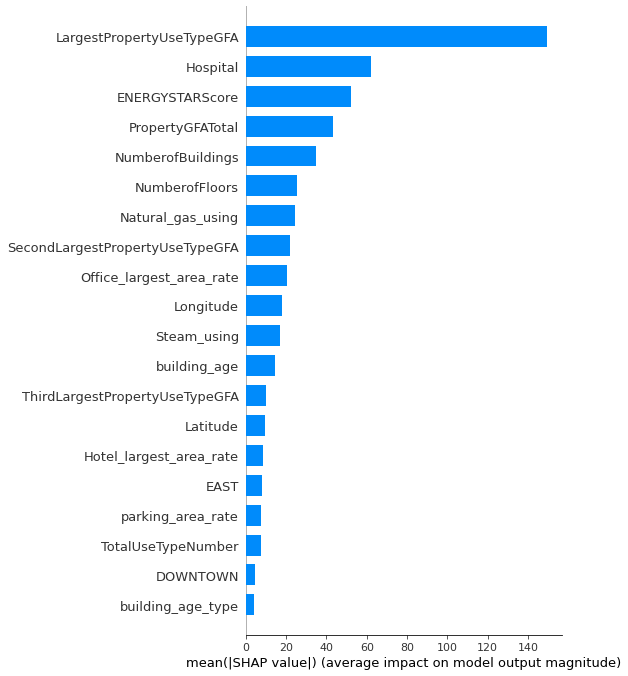

In [95]:
shap.summary_plot(shap_values, plot_type = 'bar', feature_names = data_to_model_emission_list)

## Test de l'intérêt de la variable ENERGY STAR Score pour la prédiction d’émissions

In [96]:
# TotalGHGEmissions sont les valeurs que nous voulons prédire
TotalGHGEmissions = np.array(data['TotalGHGEmissions'])

In [97]:
# Eliminer TotalGHGEmissions de data
data_to_model_emission = data.drop(['ENERGYSTARScore','SiteEnergyUseWN(kBtu)', 'SiteEnergyUse(kBtu)', 'NaturalGas(kBtu)', 'Electricity(kBtu)', 'SteamUse(kBtu)', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'TotalGHGEmissions', 'GHGEmissionsIntensity'], axis = 1)

In [98]:
# Enregistrement des noms de colonnes pour une utilisation ultérieure
data_to_model_emission_list = list(data_to_model_emission.columns)

In [99]:
# Convertir en numpy array
data_to_model_emission = np.array(data_to_model_emission)

**Training and Testing Sets**

In [100]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

In [101]:
# Split the data into training and testing sets
train_data_to_model_emission, test_data_to_model_emission, train_TotalGHGEmissions, test_TotalGHGEmissions = train_test_split(data_to_model_emission, TotalGHGEmissions, test_size = 0.25, random_state = 42)

In [102]:
print('Training data_to_model_emission Shape:', train_data_to_model_emission.shape)
print('Training TotalGHGEmissions Shape:', train_TotalGHGEmissions.shape)
print('Testing data_to_model_emission Shape:', test_data_to_model_emission.shape)
print('Testing TotalGHGEmissions Shape:', test_TotalGHGEmissions.shape)

Training data_to_model_emission Shape: (1131, 131)
Training TotalGHGEmissions Shape: (1131,)
Testing data_to_model_emission Shape: (377, 131)
Testing TotalGHGEmissions Shape: (377,)


In [103]:
regressor = xgb.XGBRegressor(eval_metric='rmsle', colsample_bytree = 0.5, gamma = 0.5, max_depth = 5, min_child_weight = 5, subsample = 0.7, n_estimators=100, learning_rate=0.3)

In [104]:
# Train the model on the training set
regressor.fit(train_data_to_model_emission, train_TotalGHGEmissions) 

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='rmsle', gamma=0.5, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=5,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [105]:
# Predictions on the training set
pred_train_XGBRegressor= regressor.predict(train_data_to_model_emission)

In [106]:
# Evaluating the performance of the model on the training set
print(np.sqrt(mean_squared_error(train_TotalGHGEmissions,pred_train_XGBRegressor)))
print(r2_score(train_TotalGHGEmissions, pred_train_XGBRegressor))

89.47702180903426
0.9793974934558887


In [107]:
# Prediction on the test set
pred_test_XGBRegressor= regressor.predict(test_data_to_model_emission)

In [108]:
# Evaluating the model on the test set
print(np.sqrt(mean_squared_error(test_TotalGHGEmissions,pred_test_XGBRegressor))) 
print(r2_score(test_TotalGHGEmissions, pred_test_XGBRegressor))

243.80295134959562
0.6406022984799036


Lorsque la variable ENERGYSTARScore est ecartee, les performances du modele ne change pas (la valeur de R-carre presque ne chapas)